# Part 2
Name: Nontapat Pintira<br>
StudentID: 6088118<br>
Sec: 1

## Exploring Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

np.random.RandomState(seed=42)

data = pd.read_csv('../data/part1.csv')
data.head()

,MEASURE_DATETIME,STATION_1,STATION_2,STATION_3,STATION_4,STATION_5,STATION_6,STATION_7,STATION_8,STATION_9,...,STATION_23,STATION_24,STATION_25,STATION_26,STATION_27,STATION_28,STATION_29,STATION_30,STATION_31,Fail
0,2038-09-26 06:30:00,-0.316324,-0.925849,-1.743750,-0.027530,0.696398,0.525047,-1.414893,-0.694111,-0.170765,...,-1.308261,-1.668797,0.364442,2.218959,2.083341,0.908619,13.273,C,5,0
1,2023-09-27 11:30:00,0.037566,-0.775905,-1.596030,1.392237,2.548514,0.109574,-2.129368,0.432420,-0.474324,...,1.067477,0.238867,-1.968316,2.687673,-0.621733,-0.089039,10.150,C,1,0
2,2035-12-14 16:30:00,0.563132,-0.958379,2.674633,0.016340,0.906380,0.370453,-1.384990,5.195813,0.074267,...,0.910014,-0.659133,0.223494,-0.121703,9.359885,0.584530,14.181,D,5,0
3,2033-08-08 04:30:00,-2.561410,-0.777853,-3.009222,-0.749824,0.407406,-0.119634,-2.528867,2.086702,-1.597778,...,2.333471,-0.515519,0.813406,3.056493,0.722678,0.266050,11.590,D,3,0
4,2025-12-04 07:30:00,-0.277855,-1.035070,-1.440109,1.537169,-0.535542,-0.055808,-1.996289,0.298748,-0.387890,...,2.114836,-1.645300,-0.886256,2.243861,0.740127,-0.034963,11.796,D,4,0


In [2]:
df = data.copy()

In [3]:
data2 = pd.read_csv('../data/part2.csv')
data2.head()

,MEASURE_DATETIME,STATION_1,STATION_2,STATION_3,STATION_4,STATION_5,STATION_6,STATION_7,STATION_8,STATION_9,...,STATION_22,STATION_23,STATION_24,STATION_25,STATION_26,STATION_27,STATION_28,STATION_29,STATION_30,STATION_31
0,2031-04-11 12:30:00,-6.138515,-0.687542,-1.128065,0.714542,5.450828,0.499464,-1.755160,-1.051172,-0.859597,...,0.969499,0.553603,-5.046365,-2.877512,1.958936,0.743942,1.354155,11.595,B,3
1,2038-02-26 01:30:00,1.436961,-1.068244,-4.154836,0.571418,1.662306,0.473979,-1.282310,1.226312,0.061424,...,0.589029,2.616902,-3.999245,-0.220411,3.947895,-1.225864,-0.043235,11.000,D,3
2,2024-01-03 17:30:00,1.476681,-0.767748,0.904137,0.979496,3.324981,-0.452631,1.045072,-1.691210,-1.437181,...,0.593108,1.976968,-2.434713,1.025172,0.987821,1.446957,1.252020,24.762,B,7
3,2028-09-17 20:30:00,-5.560943,-1.630303,-2.837705,-0.346441,-1.019634,-0.901688,-1.682851,-0.997941,-0.402375,...,0.343320,1.225099,-2.114637,1.080539,2.660239,-0.162291,0.265278,10.200,B,1
4,2027-06-22 11:30:00,-3.022456,-0.799757,-1.775154,0.785323,-2.952855,-0.936765,-5.420181,-1.327529,-0.474175,...,0.244969,0.723094,0.371546,-1.839682,-0.868708,0.772647,1.000463,42.657,A,8


In [4]:
df2 = data2.copy()

### Check for missing value

In [5]:
df.isnull().sum()

MEASURE_DATETIME    0
STATION_1           0
STATION_2           0
STATION_3           0
STATION_4           0
STATION_5           0
STATION_6           0
STATION_7           0
STATION_8           0
STATION_9           0
STATION_10          0
STATION_11          0
STATION_12          0
STATION_13          0
STATION_14          0
STATION_15          0
STATION_16          0
STATION_17          0
STATION_18          0
STATION_19          0
STATION_20          0
STATION_21          0
STATION_22          0
STATION_23          0
STATION_24          0
STATION_25          0
STATION_26          0
STATION_27          0
STATION_28          0
STATION_29          0
STATION_30          0
STATION_31          0
Fail                0
dtype: int64

The data has no missing value. That is good for me.

### Check the statistical value of the data

In [6]:
df.describe()

,STATION_1,STATION_2,STATION_3,STATION_4,STATION_5,STATION_6,STATION_7,STATION_8,STATION_9,STATION_10,...,STATION_22,STATION_23,STATION_24,STATION_25,STATION_26,STATION_27,STATION_28,STATION_29,STATION_31,Fail
count,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,...,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000
mean,-1.313971,-0.731119,-0.866843,0.821823,0.923356,-0.108355,-1.304010,0.579061,-0.493516,0.425331,...,0.697428,1.435844,-1.181708,-0.349790,2.198160,0.659262,0.283852,18.838225,3.973495,0.001728
std,2.195963,0.404456,1.450759,0.814019,2.996013,0.521609,2.174032,2.764076,0.605447,2.041088,...,0.627652,0.837940,1.991639,1.916044,2.198837,2.667571,1.238322,24.781714,2.597554,0.041537
min,-32.503416,-32.343246,-21.872772,-6.115752,-22.622136,-7.627565,-50.480777,-226.907545,-3.330241,-9.169622,...,-44.110812,-3.276974,-15.434178,-21.405041,-102.290647,-51.660607,-120.304674,10.000000,0.000000,0.000000
25%,-2.507817,-0.822090,-1.922183,0.365526,-0.932679,-0.459060,-2.376116,-0.801685,-0.848411,-1.099568,...,0.535458,0.934858,-2.507894,-1.336195,1.514985,-0.877824,-0.286639,10.560250,2.000000,0.000000
50%,-1.209207,-0.732496,-0.880215,0.825745,0.500939,-0.124929,-1.490907,0.471967,-0.452604,0.358295,...,0.685902,1.439733,-1.153917,-0.450782,2.111582,0.112210,0.244250,12.200000,4.000000,0.000000
75%,-0.026859,-0.660297,0.218378,1.280313,2.141427,0.208877,-0.395310,1.803000,-0.054086,1.904804,...,0.844571,1.934274,0.114718,0.503477,2.759198,1.456231,0.837974,17.730000,6.000000,0.000000
max,25.554706,21.834632,18.132254,6.394659,56.974184,10.187421,46.186020,70.182400,4.090935,24.463151,...,23.225335,10.934170,10.403350,38.077142,83.809017,147.263656,43.842061,2579.116000,8.000000,1.000000


We can see that some feature has extreme values, we may have to deal with it later on.

### Check the distribution of the label.

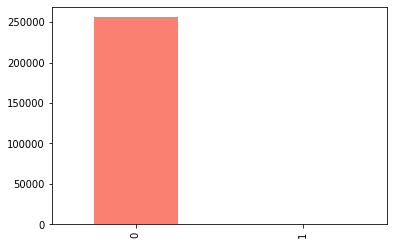

In [7]:
df.Fail.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [8]:
df.Fail.value_counts()

0    255883
1       443
Name: Fail, dtype: int64

***
### Explore the correlation between features and labels

We are going to see which station is the most correlated with the failure rate

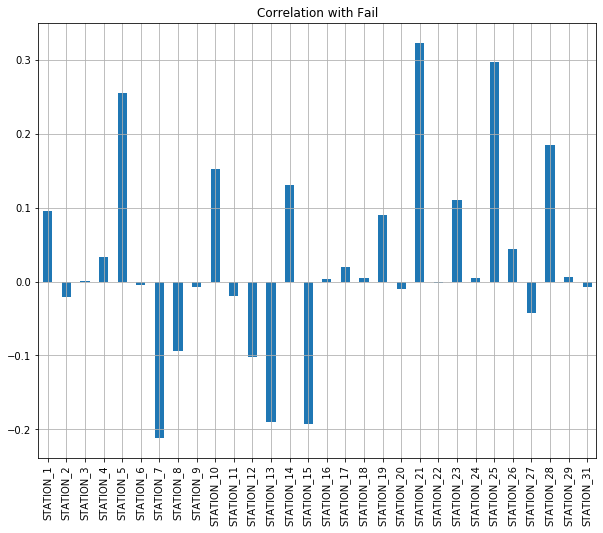

In [9]:
df.drop('Fail', axis=1).corrwith(df.Fail).plot(kind='bar',
                                               grid=True,
                                               figsize=(10, 8),
                                               title="Correlation with Fail")

We can clearly see that Station 5 ,21 25, 28 is positively correlated the Failure.

And, Station 7, 13 ,15 is negatively correlated with Failure

##### Scatter Plot between the STATION_21 and STATION_7

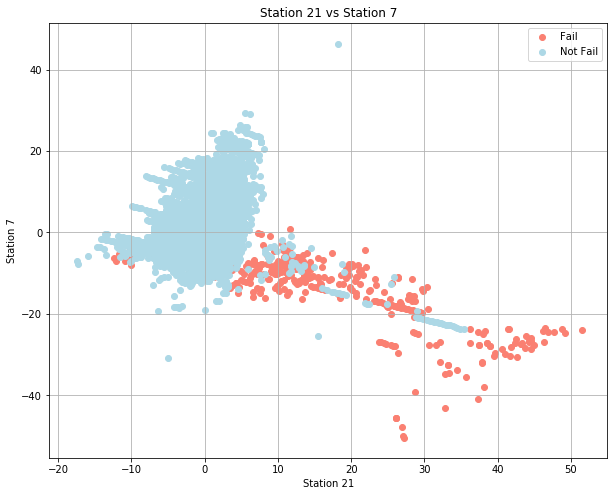

In [10]:
# Create another figure
plt.figure(figsize=(10, 8))

plt.scatter(df.STATION_21[df.Fail == 1],
            df.STATION_7[df.Fail == 1],
            c="salmon")

plt.scatter(df.STATION_21[df.Fail == 0],
            df.STATION_7[df.Fail == 0],
            c="lightblue")

# Add some helpful info
plt.title("Station 21 vs Station 7")
plt.xlabel("Station 21")
plt.ylabel("Station 7")
plt.grid(b=True)
plt.legend(["Fail", "Not Fail"])

### Explore discrete features
STATION_30 and STATION_31 have discrete features.

In [11]:
df.STATION_30.value_counts()

B    64267
A    64193
D    64068
C    63798
Name: STATION_30, dtype: int64

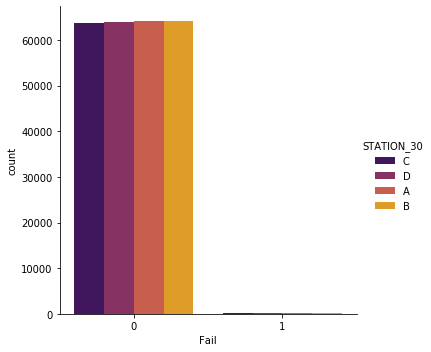

In [12]:
sns.catplot(x="Fail",
            kind="count",
            hue='STATION_30',
            palette="inferno",
            data=df)

In [13]:
pd.crosstab([df.STATION_30], [df.Fail],
            margins=True).style.background_gradient(cmap='summer_r')

Fail,0,1,All
STATION_30,,,
A,64081,112,64193
B,64166,101,64267
C,63681,117,63798
D,63955,113,64068
All,255883,443,256326


From the result of cross-tabulation, we can see that this feature does not show any correlation with the label

In [14]:
df.STATION_31.value_counts()

0    30753
2    29835
5    29293
4    28547
8    28491
6    28034
7    27974
1    26980
3    26419
Name: STATION_31, dtype: int64

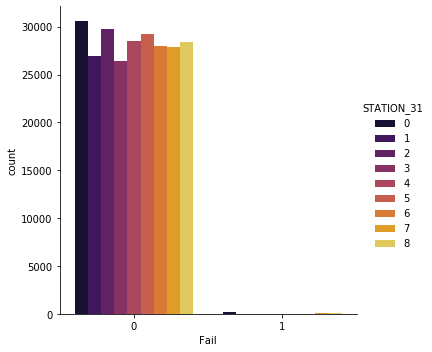

In [15]:
sns.catplot(x="Fail",
            kind="count",
            hue='STATION_31',
            palette="inferno",
            data=df)

In [16]:
pd.crosstab([df.STATION_31], [df.Fail],
            margins=True).style.background_gradient(cmap='summer_r')

Fail,0,1,All
STATION_31,,,
0,30587,166,30753
1,26953,27,26980
2,29804,31,29835
3,26410,9,26419
4,28531,16,28547
5,29266,27,29293
6,28015,19,28034
7,27910,64,27974
8,28407,84,28491


On the other hand, STATION_31 has a very very very weak correlation with the label

******
## Preprocessing

We will try fitting the data into a simple model and see how it performs.

First I will only select features which show some correlation with the label

In [67]:
features = [
    'STATION_1', 'STATION_5', 'STATION_7', 'STATION_8', 'STATION_10',
    'STATION_12', 'STATION_13', 'STATION_14', 'STATION_15', 'STATION_19',
    'STATION_21', 'STATION_23', 'STATION_25', 'STATION_28'
]

X = df[features]
y = df['Fail']

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=df['Fail'])

## Modeling

#### The data is imbalanced so we have to deal with that too
I use ensemble methods with random undersampling to tackle this issue

I use stratified K-fold since the data is imbalance and I want to preserve the distribution

Another model that I will try is to
* First, do oversampling with SMOTE.
* Second, to random undersampling to normalize the synthesized data.
* Third, I will use ensemble method, in this case RandomForestClassifier. Since random undersampling works better with ensemble model
* Fourth, I will evaluate my model using F1 score.

In [75]:
# random forest on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV

# define pipeline
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline,
                         X_train,
                         y_train,
                         scoring='f1',
                         cv=cv,
                         n_jobs=-1)
print('Mean F1: %.3f' % mean(scores))

Mean F1: 0.756


In [76]:
model.fit(X_train, y_train)

prediction = model.predict(X_test)
print('The F1-score of the RandomForestClassifier is',
      metrics.f1_score(prediction, y_test))

The F1-score of the RandomForestClassifier is 0.8699186991869919


F1-score is used here because the data is imbalanced and I would like to minimized the number of false negative error.

Moreover, I will use confusion matrix to visualize the model performance.

(2.0, 0.0)

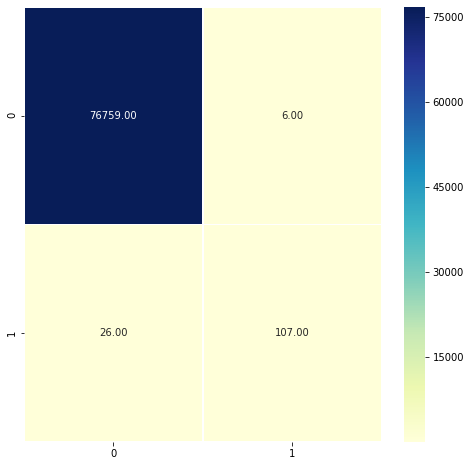

In [77]:
cm = confusion_matrix(y_test,
                      prediction,
                      labels=None,
                      sample_weight=None,
                      normalize=None)
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(cm, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Label Part 2 dataset

In [79]:
part2_label = model.predict(df2[features])
part2_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
csv = pd.DataFrame(part2_label)
csv.to_csv('label_6088118.csv', index=False)

In [87]:
df2.describe()

,STATION_1,STATION_2,STATION_3,STATION_4,STATION_5,STATION_6,STATION_7,STATION_8,STATION_9,STATION_10,...,STATION_21,STATION_22,STATION_23,STATION_24,STATION_25,STATION_26,STATION_27,STATION_28,STATION_29,STATION_31
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,...,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,-1.308528,-0.730408,-0.864333,0.829048,0.920195,-0.104563,-1.306425,0.579137,-0.494502,0.425271,...,1.164661,0.692386,1.431642,-1.168753,-0.366982,2.221551,0.670688,0.293530,18.805597,3.966188
std,2.208971,0.396152,1.457214,0.814218,3.011942,0.518288,2.210467,2.728087,0.607453,2.044501,...,1.684368,0.594955,0.840303,1.980706,1.927449,2.245670,2.637149,1.225971,26.996847,2.596470
min,-21.965693,-7.869288,-9.585846,-6.390982,-12.288655,-3.518718,-45.678429,-46.760383,-3.316298,-7.795198,...,-14.383959,-18.359777,-3.605645,-9.706114,-15.735926,-39.731350,-43.198220,-25.952903,10.000000,0.000000
25%,-2.506043,-0.822129,-1.934652,0.373255,-0.923421,-0.455583,-2.359852,-0.824010,-0.846290,-1.100203,...,0.357461,0.531007,0.932726,-2.478610,-1.351416,1.517745,-0.863844,-0.276105,10.549000,2.000000
50%,-1.220989,-0.731465,-0.879783,0.830770,0.520899,-0.120919,-1.482784,0.455927,-0.452850,0.370170,...,1.290120,0.683986,1.434358,-1.147799,-0.469975,2.116069,0.110172,0.249667,12.200000,4.000000
75%,-0.030583,-0.659466,0.216222,1.289922,2.129667,0.211711,-0.406622,1.802398,-0.054228,1.900483,...,2.124500,0.844503,1.933759,0.135020,0.462626,2.762948,1.472703,0.847806,17.648000,6.000000
max,17.611718,8.108718,20.999695,6.414517,52.609027,6.917807,29.187120,66.401992,3.504680,23.763734,...,42.316499,18.303560,10.104239,6.517474,36.636038,69.897540,28.704501,31.482148,1975.653000,8.000000
